In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('income.csv')

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [5]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [6]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [7]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

In [8]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [9]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [10]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [12]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

<Axes: >

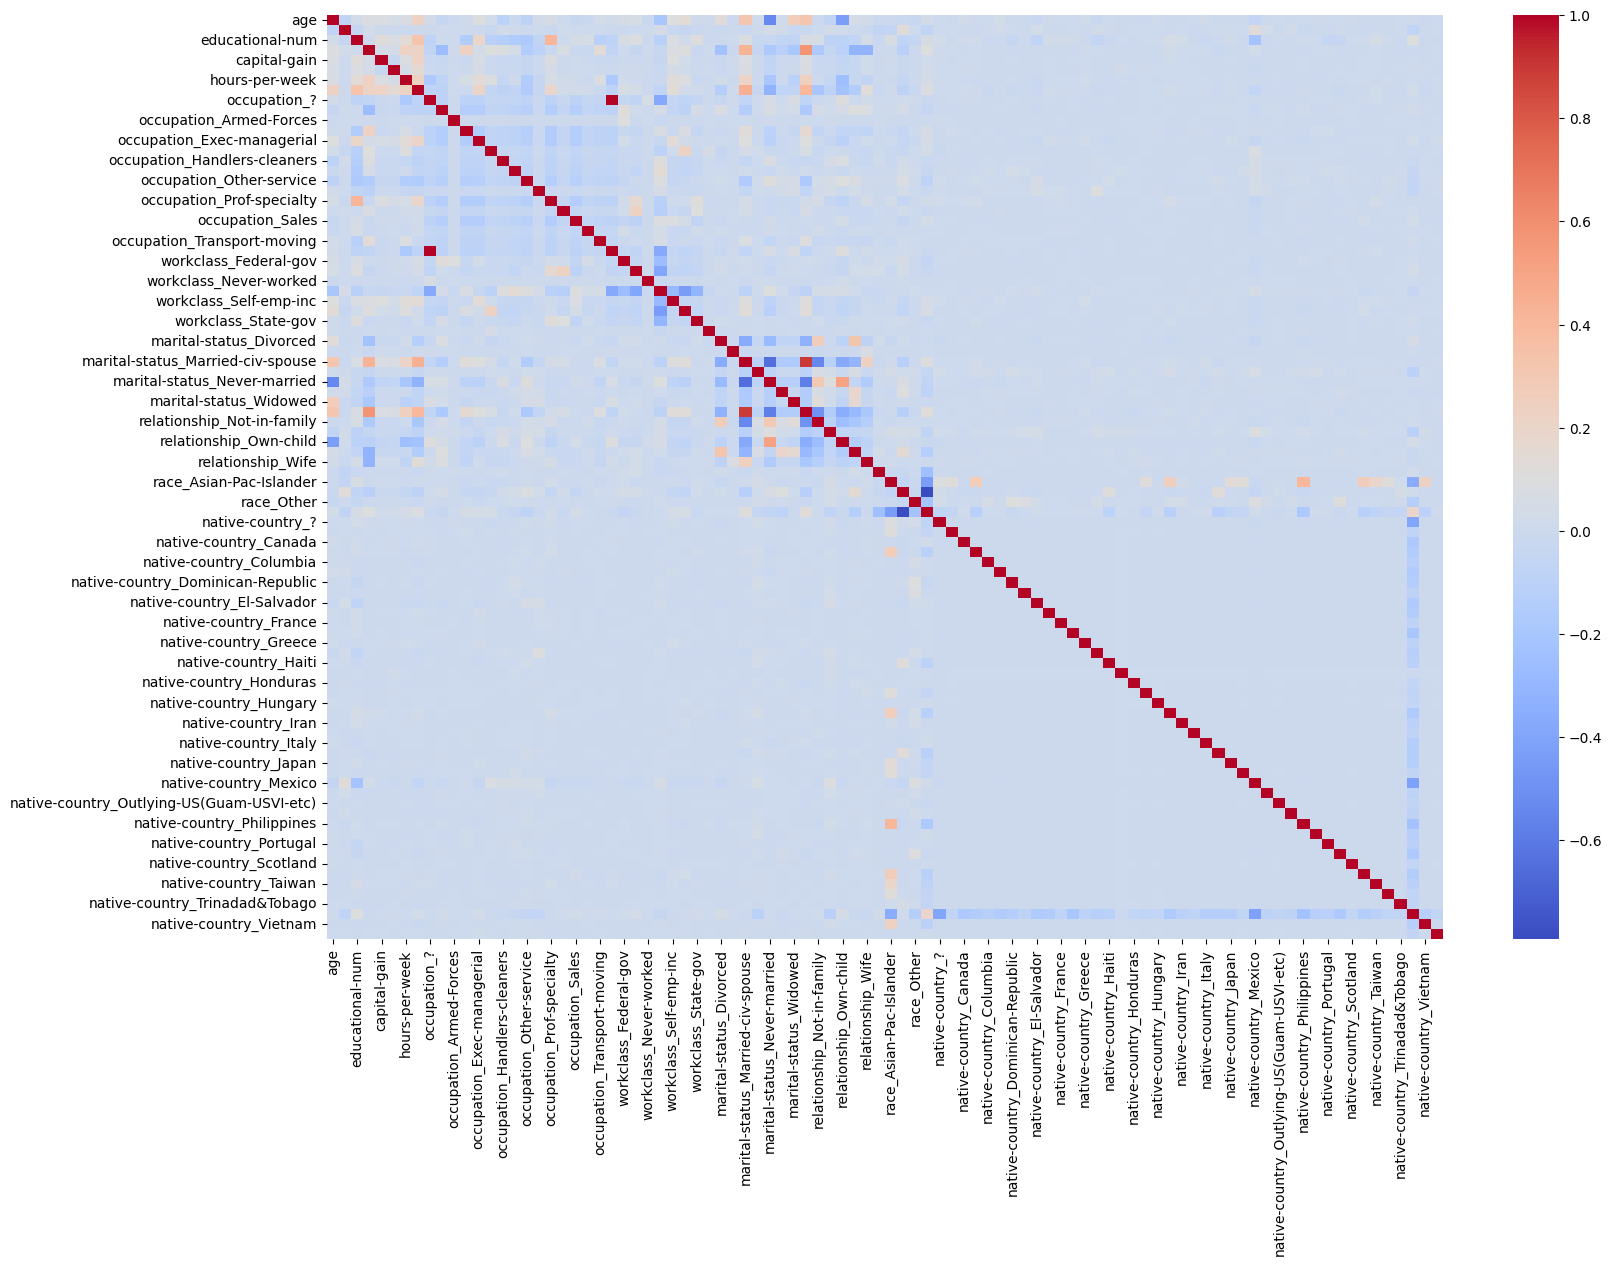

In [15]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=False,cmap='coolwarm')

In [17]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_drop = int(0.8 * len(df.columns))
droped_columns = sorted_correlations.iloc[:num_drop].index
df_droped = df.drop(droped_columns, axis=1)

<Axes: >

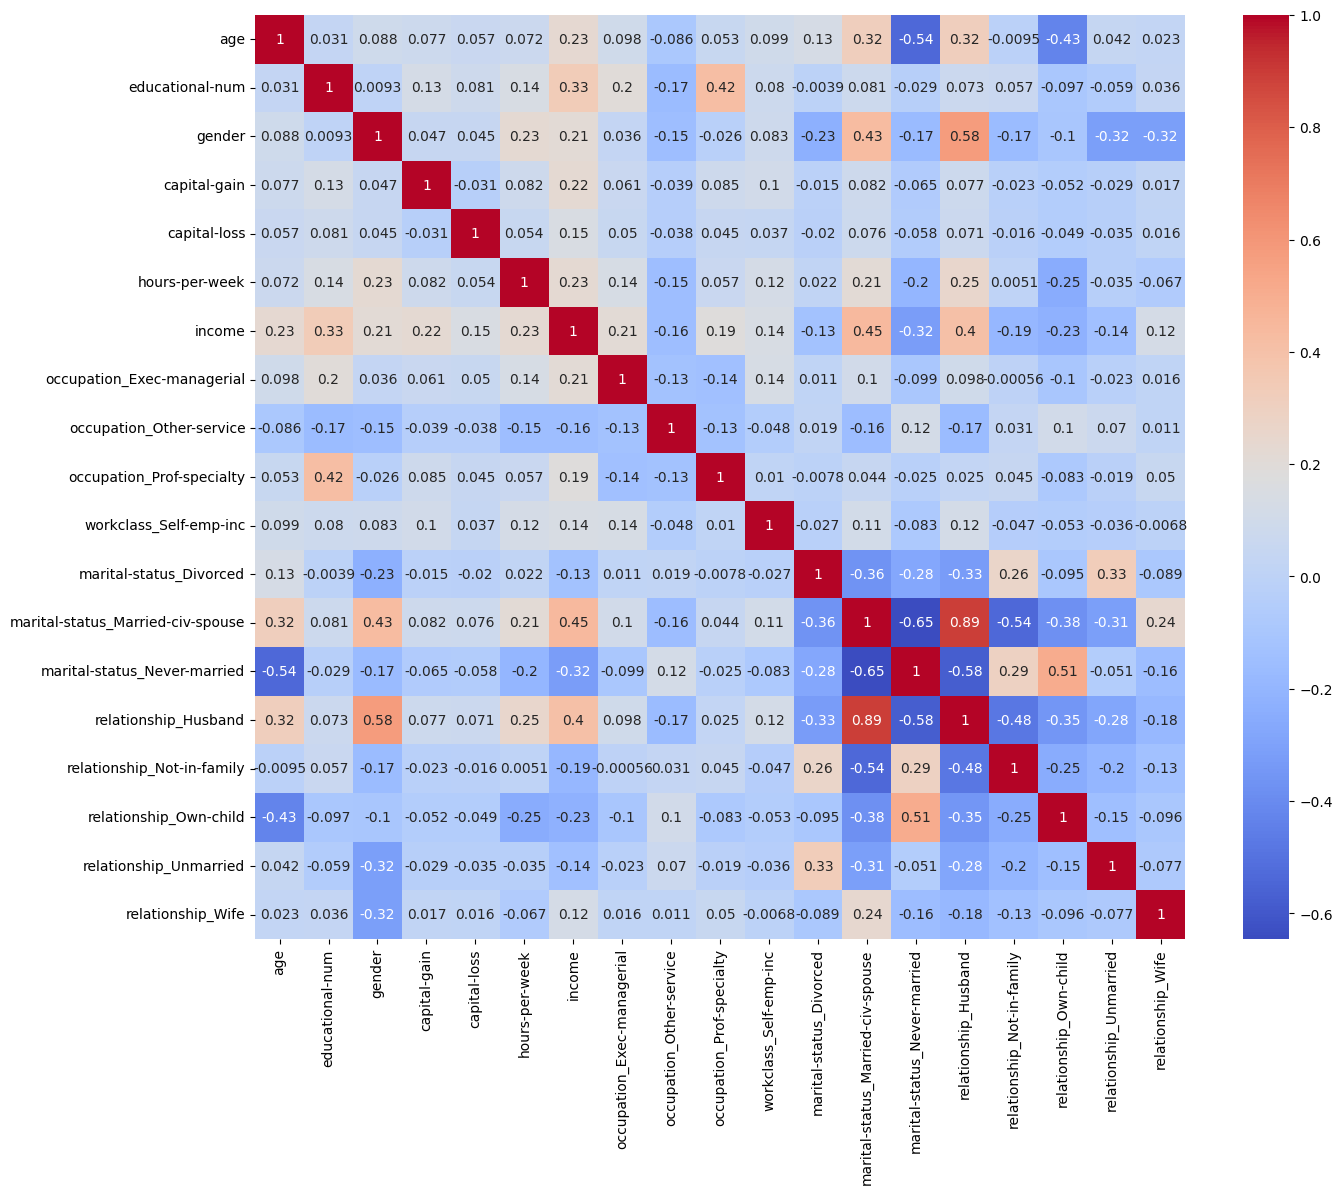

In [18]:
plt.figure(figsize = (15,12))
sns.heatmap(df_droped.corr() , cmap='coolwarm',annot = True)

In [19]:
#I use the random forest classifier because most of the data are 0 and 1
train_df , test_df = train_test_split(df,test_size=0.2)
train_x = train_df.drop('income',axis=1)
train_y = train_df['income']

test_x = test_df.drop('income',axis=1)
test_y = test_df['income']

In [21]:
random_model = RandomForestClassifier()
random_model.fit(train_x , train_y)

RandomForestClassifier()

In [22]:
#The higher the score, the better the classifier is at making accurate predictions on unseen data.
random_model.score(test_x,test_y)

0.8586344559320299

In [23]:
random_model.feature_importances_

array([1.48641443e-01, 1.69835193e-01, 1.12570256e-01, 1.11460466e-02,
       9.97371766e-02, 3.21705642e-02, 8.56471652e-02, 1.59347463e-03,
       4.53947453e-03, 5.89818283e-05, 5.47877278e-03, 1.78080304e-02,
       4.53316286e-03, 2.95858912e-03, 3.64952195e-03, 6.93751705e-03,
       1.95220575e-04, 1.57475223e-02, 2.64486650e-03, 5.87738341e-03,
       4.06413553e-03, 3.73844185e-03, 1.89082910e-03, 4.52923000e-03,
       5.04375910e-03, 2.60996828e-06, 8.58591962e-03, 5.70683307e-03,
       7.06827757e-03, 3.94497486e-03, 1.13780856e-04, 6.50580249e-03,
       2.97932132e-04, 7.20692777e-02, 8.08324774e-04, 2.08490228e-02,
       1.60983586e-03, 1.63792113e-03, 4.62444599e-02, 1.08293939e-02,
       1.56161144e-03, 8.57910336e-03, 4.64651192e-03, 8.59802971e-03,
       1.26860944e-03, 2.96584089e-03, 4.37686349e-03, 7.82849971e-04,
       5.83627589e-03, 2.35094582e-03, 3.07824263e-04, 1.27727955e-03,
       4.94067340e-04, 2.47210086e-04, 6.57950007e-04, 2.12944644e-04,
      

In [26]:
importance = dict(zip(random_model.feature_names_in_, random_model.feature_importances_))
importance = {k:v for k,v in sorted(importance.items(),key=lambda x:x[1],reverse=True)}

In [27]:
importance

{'fnlwgt': 0.16983519257911012,
 'age': 0.14864144286917216,
 'educational-num': 0.11257025577010261,
 'capital-gain': 0.09973717663369677,
 'hours-per-week': 0.08564716519895095,
 'marital-status_Married-civ-spouse': 0.07206927769041073,
 'relationship_Husband': 0.046244459948589306,
 'capital-loss': 0.03217056415889377,
 'marital-status_Never-married': 0.020849022825171426,
 'occupation_Exec-managerial': 0.0178080304043737,
 'occupation_Prof-specialty': 0.015747522265452046,
 'gender': 0.011146046587199976,
 'relationship_Not-in-family': 0.010829393853852502,
 'relationship_Wife': 0.00859802970858047,
 'workclass_Private': 0.008585919624269921,
 'relationship_Own-child': 0.008579103358200675,
 'workclass_Self-emp-not-inc': 0.007068277573511222,
 'occupation_Other-service': 0.006937517050755872,
 'marital-status_Divorced': 0.006505802493506913,
 'occupation_Sales': 0.005877383410114757,
 'race_White': 0.005836275892874119,
 'workclass_Self-emp-inc': 0.005706833067296823,
 'occupation_

In [29]:
param_grid = {
    'n_estimators' : [50,100,250],
    'max_depth' : [5,10,30,None],
    'min_samples_split' : [2,4],
    'max_features' : ['sqrt','log2']
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,verbose=10)

grid_search.fit(train_x,train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.840 total time=   1.3s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.836 total time=   1.1s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.8s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.833 total time=   0.8s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [30]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=250)

In [31]:
best_forest=grid_search.best_estimator_
best_forest.score(test_x,test_y)

0.86651653188658